# Problem Statement:
Predict a price range, indicating how high the price is, using K-Nearest Neighbors 
algorithm. 

Price_range is the target variable with the value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

# Import Data & Packages

In [8]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data=pd.read_csv(r"C:\Users\Chetan Habib\Desktop\Machine Learning\Mobile_data.csv")
data

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [3]:
data.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [4]:
data.tail()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0
1999,510,2.0,5,45,0.9,168,6,16,483,754,3919,19,4,2,3


# Data Pre-Processing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [6]:
data.isna().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

In [7]:
data.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


# Outliers

<AxesSubplot:>

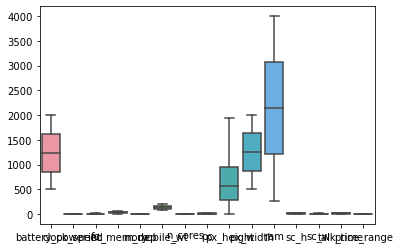

In [16]:
sns.boxplot(data=data)

In [13]:
for i in data:
    if data[i].dtypes in ("float64","int64"):
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        data[i].clip(upper=ul,lower=ll,inplace=True)

# Data Partition

In [19]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
train_x = data.drop(['price_range'],axis=1)
train_y = data['price_range']

# Train test split

X_train, X_test, y_train, y_test =train_test_split(train_x, train_y, test_size=0.3,random_state=20)

# Model Building

In [33]:
## Instantiate the model with 5 neighbors. 
model = KNeighborsClassifier(n_neighbors=378)  

# randomly taken k =  4 
# taken  k = sqrt(n)

## Fit the model on the training data.
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=378)

# Prediction on train data

In [34]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
710,663,0.8,0.0,25,0.6,183,2,1,82.0,1605,3176,6,2,2,2
917,904,1.8,3.0,35,0.4,168,3,4,42.0,507,1360,15,12,11,0
743,1159,2.8,5.0,18,0.5,83,1,7,681.0,723,2246,8,1,3,1
1303,888,2.6,2.0,33,0.4,198,2,17,327.0,1683,3407,12,1,20,3
1978,1483,2.2,3.0,53,0.7,169,5,11,291.0,651,1744,6,3,10,1


In [35]:
train['Predicted']=model.predict(X_train)
train.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range,Predicted
710,663,0.8,0.0,25,0.6,183,2,1,82.0,1605,3176,6,2,2,2,2
917,904,1.8,3.0,35,0.4,168,3,4,42.0,507,1360,15,12,11,0,0
743,1159,2.8,5.0,18,0.5,83,1,7,681.0,723,2246,8,1,3,1,1
1303,888,2.6,2.0,33,0.4,198,2,17,327.0,1683,3407,12,1,20,3,3
1978,1483,2.2,3.0,53,0.7,169,5,11,291.0,651,1744,6,3,10,1,1


# Model Performance Matrix

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['price_range'],train['Predicted'])
print(confusion_matrix)

[[347  20   0   0]
 [ 51 255  43   0]
 [  0  61 234  42]
 [  0   0  33 314]]


In [24]:
347+9+20+330+7+15+311+11+20+327

1400

In [37]:
Accuracy_Train=((347+255+234+314)/(1400)*100)
print(Accuracy_Train)

82.14285714285714


# Prediction on test data

In [38]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
1556,875,1.4,1.0,43,0.6,104,8,3,902.0,969,3396,14,2,18,3
1560,1872,0.5,5.0,26,0.5,172,4,10,672.0,1088,2273,8,4,8,2
1559,671,2.9,7.0,2,0.1,95,6,19,614.0,1617,2278,13,4,2,2
1594,586,0.6,16.0,42,0.3,121,7,17,785.0,1118,1869,12,2,7,1
906,1983,1.2,6.0,27,0.6,125,1,11,370.0,1197,3897,12,10,10,3


In [39]:
test['Predicted']=model.predict(X_test)
test.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range,Predicted
1556,875,1.4,1.0,43,0.6,104,8,3,902.0,969,3396,14,2,18,3,3
1560,1872,0.5,5.0,26,0.5,172,4,10,672.0,1088,2273,8,4,8,2,2
1559,671,2.9,7.0,2,0.1,95,6,19,614.0,1617,2278,13,4,2,2,2
1594,586,0.6,16.0,42,0.3,121,7,17,785.0,1118,1869,12,2,7,1,1
906,1983,1.2,6.0,27,0.6,125,1,11,370.0,1197,3897,12,10,10,3,3


# Model performance matrix on test data

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['price_range'],test['Predicted'])
print(confusion_matrix)

[[125   8   0   0]
 [ 21 114  16   0]
 [  0  29 109  25]
 [  0   0  13 140]]


In [41]:
Accuracy_test=((125+114+109+140)/(600)*100)
Accuracy_test

81.33333333333333

# find best value of k

In [44]:
from sklearn.metrics import accuracy_score
for K in range(400): #K=0,1,2,.....,24
    K_value = K+1 # K_value=1
    model2 = KNeighborsClassifier(n_neighbors = K_value) #1
    model2.fit(X_train, y_train) 
    y_pred_Train= model2.predict(X_train)
    y_pred_test = model2.predict(X_test)
    print("Train Accuracy is ", 
          round(accuracy_score(y_train,y_pred_Train)*100,0),"      "," Test Accuracy is ", round(accuracy_score(y_test,y_pred_test)*100,0),"% for K-Value:",
          K_value)

Train Accuracy is  100.0         Test Accuracy is  90.0 % for K-Value: 1
Train Accuracy is  95.0         Test Accuracy is  90.0 % for K-Value: 2
Train Accuracy is  96.0         Test Accuracy is  92.0 % for K-Value: 3
Train Accuracy is  95.0         Test Accuracy is  91.0 % for K-Value: 4
Train Accuracy is  96.0         Test Accuracy is  93.0 % for K-Value: 5
Train Accuracy is  94.0         Test Accuracy is  90.0 % for K-Value: 6
Train Accuracy is  95.0         Test Accuracy is  93.0 % for K-Value: 7
Train Accuracy is  94.0         Test Accuracy is  92.0 % for K-Value: 8
Train Accuracy is  96.0         Test Accuracy is  93.0 % for K-Value: 9
Train Accuracy is  95.0         Test Accuracy is  92.0 % for K-Value: 10
Train Accuracy is  95.0         Test Accuracy is  94.0 % for K-Value: 11
Train Accuracy is  95.0         Test Accuracy is  93.0 % for K-Value: 12
Train Accuracy is  95.0         Test Accuracy is  94.0 % for K-Value: 13
Train Accuracy is  95.0         Test Accuracy is  93.0 % fo

Train Accuracy is  90.0         Test Accuracy is  91.0 % for K-Value: 114
Train Accuracy is  90.0         Test Accuracy is  90.0 % for K-Value: 115
Train Accuracy is  90.0         Test Accuracy is  90.0 % for K-Value: 116
Train Accuracy is  90.0         Test Accuracy is  90.0 % for K-Value: 117
Train Accuracy is  90.0         Test Accuracy is  90.0 % for K-Value: 118
Train Accuracy is  90.0         Test Accuracy is  90.0 % for K-Value: 119
Train Accuracy is  90.0         Test Accuracy is  90.0 % for K-Value: 120
Train Accuracy is  90.0         Test Accuracy is  90.0 % for K-Value: 121
Train Accuracy is  90.0         Test Accuracy is  90.0 % for K-Value: 122
Train Accuracy is  90.0         Test Accuracy is  90.0 % for K-Value: 123
Train Accuracy is  90.0         Test Accuracy is  90.0 % for K-Value: 124
Train Accuracy is  90.0         Test Accuracy is  90.0 % for K-Value: 125
Train Accuracy is  90.0         Test Accuracy is  90.0 % for K-Value: 126
Train Accuracy is  89.0         Test A

Train Accuracy is  87.0         Test Accuracy is  87.0 % for K-Value: 225
Train Accuracy is  87.0         Test Accuracy is  87.0 % for K-Value: 226
Train Accuracy is  87.0         Test Accuracy is  87.0 % for K-Value: 227
Train Accuracy is  87.0         Test Accuracy is  87.0 % for K-Value: 228
Train Accuracy is  87.0         Test Accuracy is  87.0 % for K-Value: 229
Train Accuracy is  86.0         Test Accuracy is  87.0 % for K-Value: 230
Train Accuracy is  87.0         Test Accuracy is  87.0 % for K-Value: 231
Train Accuracy is  86.0         Test Accuracy is  87.0 % for K-Value: 232
Train Accuracy is  86.0         Test Accuracy is  86.0 % for K-Value: 233
Train Accuracy is  86.0         Test Accuracy is  87.0 % for K-Value: 234
Train Accuracy is  87.0         Test Accuracy is  87.0 % for K-Value: 235
Train Accuracy is  86.0         Test Accuracy is  87.0 % for K-Value: 236
Train Accuracy is  86.0         Test Accuracy is  87.0 % for K-Value: 237
Train Accuracy is  87.0         Test A

Train Accuracy is  84.0         Test Accuracy is  84.0 % for K-Value: 336
Train Accuracy is  84.0         Test Accuracy is  84.0 % for K-Value: 337
Train Accuracy is  84.0         Test Accuracy is  84.0 % for K-Value: 338
Train Accuracy is  84.0         Test Accuracy is  84.0 % for K-Value: 339
Train Accuracy is  84.0         Test Accuracy is  84.0 % for K-Value: 340
Train Accuracy is  84.0         Test Accuracy is  84.0 % for K-Value: 341
Train Accuracy is  83.0         Test Accuracy is  84.0 % for K-Value: 342
Train Accuracy is  83.0         Test Accuracy is  84.0 % for K-Value: 343
Train Accuracy is  84.0         Test Accuracy is  84.0 % for K-Value: 344
Train Accuracy is  84.0         Test Accuracy is  84.0 % for K-Value: 345
Train Accuracy is  83.0         Test Accuracy is  83.0 % for K-Value: 346
Train Accuracy is  83.0         Test Accuracy is  83.0 % for K-Value: 347
Train Accuracy is  83.0         Test Accuracy is  83.0 % for K-Value: 348
Train Accuracy is  83.0         Test A